In [1]:
"""                             iSIM_MODULES
    ----------------------------------------------------------------------
    
    Miranda-Quintana Group, Department of Chemistry, University of Florida 
    
    ----------------------------------------------------------------------
    
    Please, cite the original paper on iSIM:

    ----------------------------------------------------------------------

    This file contains an example of generation of fingerprints from smiles strings
    and comparison of molecules using the iSIM method.

    """

'                             iSIM_MODULES\n    ----------------------------------------------------------------------\n    \n    Miranda-Quintana Group, Department of Chemistry, University of Florida \n    \n    ----------------------------------------------------------------------\n    \n    Please, cite the original paper on iSIM:\n\n    ----------------------------------------------------------------------\n\n    This file contains an example of generation of fingerprints and comparison\n    of molecules using the iSIM method.\n\n    '

In [10]:
from isim_comp import *
import pandas as pd
import os
import rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw


In [20]:
### Access remotly the databases worked on the iSIM paper
### The databases are available at: https://github.com/molML/MoleculeACE/blob/main/MoleculeACE/Data/benchmark_data/old/

git_path = 'https://raw.githubusercontent.com/molML/MoleculeACE/main/MoleculeACE/Data/benchmark_data/old/'

### Please cite the original paper where the databases were cured:
"""Exposing the Limitations of Molecular Machine Learning with Activity Cliffs. Derek van Tilborg, Alisa Alenicheva, and Francesca Grisoni. 
Journal of Chemical Information and Modeling, 2022, 62 (23), 5938-5951. DOI: 10.1021/acs.jcim.2c01073"""

### Desired dataset 
dataset = 'CHEMBL214_Ki.csv'

### Download the dataset
os.system('wget ' + git_path + dataset)

--2024-03-29 17:07:17--  https://raw.githubusercontent.com/molML/MoleculeACE/main/MoleculeACE/Data/benchmark_data/old/CHEMBL214_Ki.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 266241 (260K) [text/plain]
Saving to: ‘CHEMBL214_Ki.csv.1’

     0K .......... .......... .......... .......... .......... 19% 3.12M 0s
    50K .......... .......... .......... .......... .......... 38% 5.25M 0s
   100K .......... .......... .......... .......... .......... 57% 13.7M 0s
   150K .......... .......... .......... .......... .......... 76% 18.5M 0s
   200K .......... .......... .......... .......... .......... 96% 8.44M 0s
   250K ..........                                            100%  277M=0.04s

2024-03-29 17:07:17 (6.87 MB/s) - ‘CHEMBL214_Ki.csv.1’ saved [266

0

In [21]:
# Generation of binary fingerprints from a SMILES
# This is step is only necesary if you do not have your data as fingerprints

# Read the SMILES from a csv file
df = pd.read_csv(dataset) # --> This file contains the smiles of the molecules, change it for your own data
smiles = df['smiles'].tolist() # --> This is a list of smiles, change column name for your own data

# Generation of RDKit fingerprints
fps = []
for smi in smiles:
    try:
        mol = Chem.MolFromSmiles(smi)
        fp = np.array([])
        DataStructs.cDataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(mol), fp)
        fps.append(fp)
        
    except:
        print('Invalid SMILES: ', smi)

fps = np.array(fps)

# Optional: save the fingerprints in a npy file
# np.save('fps_iSIM_example.npy', fps)    

In [4]:
# Load the fingerprints from a npy file (optional, in case you have already generated the fingerprints)
# fps = np.load('fps_iSIM_example.npy', allow_pickle=True)

In [28]:
# Calculate iSIM value for a desired index
index = 'RR' # --> Change JT, RR or SM
n_molecules = len (fps)
print('Number of molecules: ', n_molecules)
print('isim: ', np.round(calculate_isim(fps, n_ary = index), 5))

Number of molecules:  3317
isim:  0.20331


In [29]:
# Calculate the average pairwise similarity compute in an O(N^2) time
pairwise_sims = []
for i in range(n_molecules):
    for j in range(n_molecules):
        if i != j: pairwise_sims.append(calculate_isim(np.array([fps[i], fps[j]]), n_ary = index))
print('Average pairwise similarity: ', np.round(np.mean(pairwise_sims), 5))

Average pairwise similarity:  0.20331


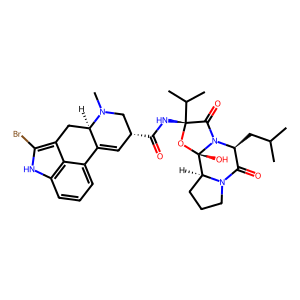

In [30]:
# Get the medoid (most similar molecule to the rest of the molecules), drawing work if smiles are available
medoid = calculate_medoid(fps, n_ary = index)
mol = Chem.MolFromSmiles(smiles[medoid])
Draw.MolToImage(mol)

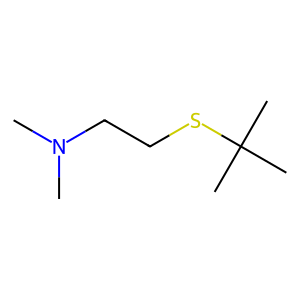

In [31]:
# Get the outliers (most dissimilar molecules to the rest of the molecules), drawing work if smiles are available
outlier = calculate_outlier(fps, n_ary = index)
mol = Chem.MolFromSmiles(smiles[outlier])
Draw.MolToImage(mol)